In [ ]:
# Başvuru yılı ---> Veri setinden at, seçilmeyi etkilemiyor.
# Cinsiyet ---> ERKEK ile Erkek olanları merge et. "Belirtmek istemiyorum" olanları düşünelim.
# Dogum Tarihi ----> ASKIDA
# Doğum Yeri ----> Sadece şehir yazanlar okey. İçinde şehir ismi geçenler for loopla sadeleştirilsin. Şehir geçmeyenlerin belki şehri bulunabilir ama çok sonraki iş
# İkametgah Şehri ---> büyük küçük harf, I İ değişimleri dikkate alınmadan temizlik yapılacak, / ile ayrılanların / işaretinin sağ tarafı alınacak
# Üniversite Adi ---> minimum belli bir sayıda girilmiş üniversiteleri listeden atıcaz.
# Üniversite Türü ---> DEVLET ve Devlet,,, ÖZEL ve Özel birleştir.
# Burslu ise Burs Yüzdesi ----> ASKIDA çoğunun %0 olduğu için etkilemez diye düşünüyorum ama bakalım 
# Burs Alıyor mu ? ----> Evetleri ve hayırları kendi içinde merge et
# Bölüm ---> ASKIDA
# Üniversite Kaçıncı Sınıf ----> hazırlıkları merge et.
# Üniversite Not Ortalaması ----> Belli aralıklar vererek Kategorik değişkene çevir
# Daha Once Baska Bir Universiteden Mezun Olmus ----> TEMİZ VERİ
# Lise Adi ----> Veri setinden at, seçilmeyi etkilemiyor.
# Lise Adi Diğer ----> Veri setinden at
# Lise Sehir ----> Veri setinden at
# Lise Türü ----> Etkiliyor olabilir. Anadolu, Fen , Meslek , Özel kendi içlerinde merge et.
# Lise Bölümü ----> Veri setinden at.
# Lise Mezuniyet Notu ----> Belli aralıklar vererek Kategorik değişkene çevir. df['Lise Mezuniyet Notu Aralik'] = pd.cut(df['Lise Mezuniyet Notu'], bins, labels=labels)
# Baska Bir Kurumdan Burs Aliyor mu?----> TEMİZ VERİ
# Burs Aldigi Baska Kurum ----> Bence Etkilemiyor atalım.
# Baska Kurumdan Aldigi Burs Miktari ----> Yine Belli aralıklar vererek Kategorik değişkene çevir
# Anne Egitim Durumu----> ilkokul, üni, lise kendi aralarında merge et.
# Anne Çalışma Durumu ----> TEMİZ VERİ
# Anne Sektor----> Kendi içlerinde merge et.
# BABA İÇİN DE YUKARIDAKİLER GEÇERLİ
# Kardeş Sayısı ----> Abartılan sayıları at sütundan
# Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz? ---> TEMİZ VERİ
# Uye Oldugunuz Kulubun Ismi----> Gereksiz bence atalım.
# Profesyonel Bir Spor Daliyla Mesgul musunuz?----> TEMİZ VERİ
# Spor Dalindaki Rolunuz Nedir? ----> Gereksiz gerekli de olabilir !!!!!
# Aktif olarak bir STK üyesi misiniz? ----> TEMİZ VERİ
# Hangi STK'nin Uyesisiniz? ----> Gereksiz bence atalım
# Stk Projesine Katildiniz Mi?----> TEMİZ VERİ
# Girisimcilikle Ilgili Deneyiminiz Var Mi? ----> TEMİZ VERİ
# Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?----> Riskli NLP uygulanabilir ama bize gelmez. !!!!!
# Ingilizce Biliyor musunuz?----> TEMİZ VERİ
# Ingilizce Seviyeniz? -----> TEMİZ VERİ ( NaN değerleri 0 ile merge et.)
# Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite---> Bence Üni adı önemli değil var mı yok mu onu kategorik değişkene çevirelim.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("train.csv")
df.head(30)

C:\Users\fbdog\AppData\Local\Temp\ipykernel_15748\2884217093.py:1: DtypeWarning: Columns (13,15,19,30,32,37,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train.csv")


,Basvuru Yili,Degerlendirme Puani,Cinsiyet,Dogum Tarihi,Dogum Yeri,Ikametgah Sehri,Universite Adi,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,...,Spor Dalindaki Rolunuz Nedir?,Aktif olarak bir STK üyesi misiniz?,Hangi STK'nin Uyesisiniz?,Stk Projesine Katildiniz Mi?,Girisimcilikle Ilgili Deneyiminiz Var Mi?,Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?,Ingilizce Biliyor musunuz?,Ingilizce Seviyeniz?,"Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite",id
0,2014,52.0,Erkek,4/6/1994,"Altindag, Ankara",Ankara,İHSAN DOĞRAMACI BİLKENT,Özel,100.0,Evet,...,Diğer,Hayır,NaN,Evet,Hayır,NaN,NaN,NaN,NaN,0
1,2014,30.0,Erkek,6/11/1993,Üsküdar,İstanbul,İHSAN DOĞRAMACI BİLKENT,Özel,100.0,Hayır,...,0,Hayır,NaN,Evet,Evet,Bilkent Cyberparkta bir şirkette Türkiye nin i...,NaN,NaN,NaN,1
2,2014,18.0,Erkek,1/15/1986,Samsun,İstanbul,ULUSLARARASI KIBRIS ÜNİVERSİTESİ,Özel,100.0,Hayır,...,0,Hayır,NaN,Hayır,Hayır,NaN,NaN,NaN,NaN,2
3,2014,40.0,Erkek,6/4/1991,Diyarbakır,İstanbul,İSTANBUL ŞEHİR ÜNİVERSİTESİ,Özel,100.0,Evet,...,0,Hayır,NaN,Evet,Hayır,NaN,NaN,NaN,NaN,3
4,2014,24.0,Erkek,2 Kasim 1992,Ankara/Altındağ,Ankara,TURGUT ÖZAL ÜNİVERSİTESİ,Özel,100.0,Evet,...,0,Hayır,NaN,Hayır,Hayır,NaN,NaN,NaN,NaN,4
5,2014,37.0,Erkek,4/14/1992,İSTANBUL,İstanbul,İSTANBUL TİCARET ÜNİVERSİTESİ,Özel,100.0,Evet,...,0,Hayır,NaN,Hayır,Hayır,NaN,NaN,NaN,NaN,5
6,2014,18.0,Erkek,10/13/1994,İstanbul,İstanbul,İSTANBUL MEDİPOL ÜNİVERSİTESİ,Özel,100.0,Hayır,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
7,2014,24.0,Erkek,3/18/1993,İstanbul,İstanbul,FATİH SULTAN MEHMET VAKIF,Özel,100.0,Evet,...,0,Hayır,NaN,Evet,Hayır,NaN,NaN,NaN,NaN,7
8,2014,40.0,Erkek,29 Aralik 1991,Erzincan- Refahiye,Esenler/İstanbul,BAHÇEŞEHİR ÜNİVERSİTESİ,Özel,100.0,Evet,...,0,Evet,Demokratikleşme çabaları,Evet,Evet,Konvansiyonel medyanın dönüşümüne ve tüketimin...,NaN,NaN,NaN,8
9,2014,31.0,Erkek,4/25/1991,Sivas,İstanbul,İSTANBUL TİCARET ÜNİVERSİTESİ,Özel,100.0,Evet,...,Diğer,Hayır,NaN,Hayır,Hayır,NaN,NaN,NaN,NaN,9


In [4]:
df["Dogum Tarihi"].value_counts()

Dogum Tarihi
1/1/70 2:00         1655
1/1/00 0:00          179
1/1/01 0:00          154
1/1/1997             139
1/1/1998             129
                    ... 
1992-05-12             1
1997-03-19             1
1996-08-17             1
1991-04-23             1
12.11.2003 00:00       1
Name: count, Length: 13498, dtype: int64

In [5]:
def check_df(dataframe, head=5):
    print("###### Shape ######")
    print(dataframe.shape)
    
    print("\n###### Types ######")
    print(dataframe.dtypes)
    
    print("\n###### Head ######")
    print(dataframe.head(head))
    
    print("\n###### Tail ######")
    print(dataframe.tail(head))

    print("\n###### NaN ######")
    print(dataframe.isnull().sum())

    print("\n###### Quantiles ######")
    print(dataframe.describe().T)

check_df(df)

###### Shape ######
(65125, 44)

###### Types ######
Basvuru Yili                                                   int64
Degerlendirme Puani                                          float64
Cinsiyet                                                      object
Dogum Tarihi                                                  object
Dogum Yeri                                                    object
Ikametgah Sehri                                               object
Universite Adi                                                object
Universite Turu                                               object
Burslu ise Burs Yuzdesi                                      float64
Burs Aliyor mu?                                               object
Bölüm                                                         object
Universite Kacinci Sinif                                      object
Universite Not Ortalamasi                                     object
Daha Once Baska Bir Universiteden Mezun Olmus     

In [6]:
# Sütun isimlerini liste halinde almak
column_names = df.columns

# İlgili sütun numaralarını çağırmak (13, 15, 19, 30, 32, 37, 41, 42 numaralı sütunlar)
selected_columns = column_names[[13, 15, 19, 30, 32, 37, 41, 42]]
selected_columns

Index(['Daha Once Baska Bir Universiteden Mezun Olmus', 'Lise Adi Diger',
       'Lise Bolum Diger', 'Kardes Sayisi', 'Uye Oldugunuz Kulubun Ismi',
       'Stk Projesine Katildiniz Mi?', 'Ingilizce Seviyeniz?',
       'Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite'],
      dtype='object')

In [7]:
df["Kardes Sayisi"]

0          1
1          1
2          6
3         10
4          1
        ... 
65120    4.0
65121    4.0
65122    3.0
65123    2.0
65124    2.0
Name: Kardes Sayisi, Length: 65125, dtype: object

In [8]:
def how_many_types(dataframe, col_name):
    
    diff_types = set(dataframe[col_name].apply(type))
    num_of_diff_types =len(diff_types)
    print(f"Sütunda {num_of_diff_types} farklı veri tipi var: {diff_types} ")

how_many_types(df, 'Uye Oldugunuz Kulubun Ismi')

Sütunda 2 farklı veri tipi var: {<class 'float'>, <class 'str'>} 


In [9]:
#### Genel olarak category, bool, object, tipindeki sütunları bulma
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]
cat_cols

['Cinsiyet',
 'Dogum Tarihi',
 'Dogum Yeri',
 'Ikametgah Sehri',
 'Universite Adi',
 'Universite Turu',
 'Burs Aliyor mu?',
 'Bölüm',
 'Universite Kacinci Sinif',
 'Universite Not Ortalamasi',
 'Daha Once Baska Bir Universiteden Mezun Olmus',
 'Lise Adi',
 'Lise Adi Diger',
 'Lise Sehir',
 'Lise Turu',
 'Lise Bolumu',
 'Lise Bolum Diger',
 'Lise Mezuniyet Notu',
 'Baska Bir Kurumdan Burs Aliyor mu?',
 'Burs Aldigi Baska Kurum',
 'Baska Kurumdan Aldigi Burs Miktari',
 'Anne Egitim Durumu',
 'Anne Calisma Durumu',
 'Anne Sektor',
 'Baba Egitim Durumu',
 'Baba Calisma Durumu',
 'Baba Sektor',
 'Kardes Sayisi',
 'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?',
 'Uye Oldugunuz Kulubun Ismi',
 'Profesyonel Bir Spor Daliyla Mesgul musunuz?',
 'Spor Dalindaki Rolunuz Nedir?',
 'Aktif olarak bir STK üyesi misiniz?',
 "Hangi STK'nin Uyesisiniz?",
 'Stk Projesine Katildiniz Mi?',
 'Girisimcilikle Ilgili Deneyiminiz Var Mi?',
 'Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?',
 'I

In [10]:
#### Kategorik tipte gözüken ama kardinalitisi yüksek sütunları bulma
cat_but_car = [ col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]
cat_but_car

['Dogum Tarihi',
 'Dogum Yeri',
 'Ikametgah Sehri',
 'Universite Adi',
 'Bölüm',
 'Lise Adi',
 'Lise Adi Diger',
 'Lise Sehir',
 'Lise Bolumu',
 'Lise Bolum Diger',
 'Burs Aldigi Baska Kurum',
 'Baska Kurumdan Aldigi Burs Miktari',
 'Anne Egitim Durumu',
 'Baba Egitim Durumu',
 'Kardes Sayisi',
 'Uye Oldugunuz Kulubun Ismi',
 "Hangi STK'nin Uyesisiniz?",
 'Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?',
 'Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite']

In [11]:
#### Sayısal Tipte olan ancak Kategorik veri içeren sütunları bulma
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int64", "float64"]]
num_but_cat

['Basvuru Yili']

In [12]:
# Kardinalitisi yüksek kategorik verileri listeden atma
cat_cols = [col for col in cat_cols if col not in cat_but_car]
cat_cols

['Cinsiyet',
 'Universite Turu',
 'Burs Aliyor mu?',
 'Universite Kacinci Sinif',
 'Universite Not Ortalamasi',
 'Daha Once Baska Bir Universiteden Mezun Olmus',
 'Lise Turu',
 'Lise Mezuniyet Notu',
 'Baska Bir Kurumdan Burs Aliyor mu?',
 'Anne Calisma Durumu',
 'Anne Sektor',
 'Baba Calisma Durumu',
 'Baba Sektor',
 'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?',
 'Profesyonel Bir Spor Daliyla Mesgul musunuz?',
 'Spor Dalindaki Rolunuz Nedir?',
 'Aktif olarak bir STK üyesi misiniz?',
 'Stk Projesine Katildiniz Mi?',
 'Girisimcilikle Ilgili Deneyiminiz Var Mi?',
 'Ingilizce Biliyor musunuz?',
 'Ingilizce Seviyeniz?']

In [13]:
df.groupby("Cinsiyet")["Degerlendirme Puani"].mean()

Cinsiyet
Belirtmek istemiyorum    30.165217
ERKEK                    25.591091
Erkek                    34.534854
Kadın                    32.436900
Name: Degerlendirme Puani, dtype: float64

In [14]:
df["Cinsiyet"].value_counts()

Cinsiyet
Kadın                    32077
Erkek                    22752
ERKEK                    10012
Belirtmek istemiyorum      115
Name: count, dtype: int64

In [15]:
# Her sütundaki eşsiz değerleri gösterme
def col_values(dataframe):
    for col in dataframe.columns:
        print(dataframe[col].value_counts())
        print("*****************************")

col_values(df)

Basvuru Yili
2021    11594
2017    10325
2015     7804
2020     7760
2022     7622
2019     7248
2014     6454
2016     5213
2018     1105
Name: count, dtype: int64
*****************************
Degerlendirme Puani
28.0     2063
22.0     2041
18.0     1995
24.0     1785
12.0     1740
         ... 
85.0        2
83.0        2
100.0       2
89.0        1
95.0        1
Name: count, Length: 97, dtype: int64
*****************************
Cinsiyet
Kadın                    32077
Erkek                    22752
ERKEK                    10012
Belirtmek istemiyorum      115
Name: count, dtype: int64
*****************************
Dogum Tarihi
1/1/70 2:00         1655
1/1/00 0:00          179
1/1/01 0:00          154
1/1/1997             139
1/1/1998             129
                    ... 
1992-05-12             1
1997-03-19             1
1996-08-17             1
1991-04-23             1
12.11.2003 00:00       1
Name: count, Length: 13498, dtype: int64
*****************************
Dogum Yeri
İsta

In [16]:
# Bütün harfleri küçük yapma
def all_letters_lowed(dataframe, col_name):
    dataframe[col_name] = dataframe[col_name].str.lower()

In [17]:
# Dogum Yeri Sadeleştirme
import pandas as pd
import re

def city_simp(dataframe, col_name):
    # Türkiye'nin 81 ili
    cities = ['Adana', 'Adıyaman', 'Afyonkarahisar', 'Ağrı', 'Amasya', 'Ankara', 'Antalya', 'Artvin', 'Aydın', 'Balıkesir', 'Bilecik',
              'Bingöl', 'Bitlis', 'Bolu', 'Burdur', 'Bursa', 'Çanakkale', 'Çankırı', 'Çorum', 'Denizli', 'Diyarbakır', 'Edirne',
              'Elazığ', 'Erzincan', 'Erzurum', 'Eskişehir', 'Gaziantep', 'Giresun', 'Gümüşhane', 'Hakkari', 'Hatay', 'Isparta',
              'Mersin', 'İstanbul', 'İzmir', 'Kars', 'Kastamonu', 'Kayseri', 'Kırklareli', 'Kırşehir', 'Kocaeli', 'Konya', 'Kütahya',
              'Malatya', 'Manisa', 'Kahramanmaraş', 'Mardin', 'Muğla', 'Muş', 'Nevşehir', 'Niğde', 'Ordu', 'Rize', 'Sakarya',
              'Samsun', 'Siirt', 'Sinop', 'Sivas', 'Tekirdağ', 'Tokat', 'Trabzon', 'Tunceli', 'Şanlıurfa', 'Uşak', 'Van', 'Yozgat',
              'Zonguldak', 'Aksaray', 'Bayburt', 'Karaman', 'Kırıkkale', 'Batman', 'Şırnak', 'Bartın', 'Ardahan', 'Iğdır',
              'Yalova', 'Karabük', 'Kilis', 'Osmaniye', 'Düzce']
    
    def extract_city(location):
        # 'location' bir string değilse, None döndür
        if not isinstance(location, str):
            return None
        
        # Şehir isimlerinin geçerli olduğu yerleri bulmak için regex kullanılır
        for city in cities:
            if re.search(r'\b' + re.escape(city) + r'\b', location):
                return city
        return None
    
    # Belirtilen sütundaki şehir isimlerini ayıklama
    dataframe[col_name] = dataframe[col_name].apply(extract_city)

# Fonksiyonu uygulama
city_simp(df, 'Dogum Yeri')
city_simp(df, 'Ikametgah Sehri')

#df

            

In [18]:
# Üni ortalamaları belli aralıklarla sadeleştirmek

bins = [0, 1.99, 2.49, 2.99, 3.49, 4]
labels = ['0-1.99', '2-2.49', '2.5-2.99', '3-3.49', '3.5-4']

#df['Uni Ortalama'] = pd.cut(df['Universite Not Ortalamasi'], bins, labels=labels)
#df

In [19]:
float_degerler = df[df['Universite Not Ortalamasi'].apply(lambda x: isinstance(x, str))]
float_degerler["Universite Not Ortalamasi"]

0             3.50-3
1          3.00-2.50
3          3.00-2.50
4          3.00-2.50
5             3.50-3
            ...     
65120       0 - 1.79
65121     Hazırlığım
65122       0 - 1.79
65123       0 - 1.79
65124    2.50 - 2.99
Name: Universite Not Ortalamasi, Length: 62372, dtype: object

In [20]:
how_many_types(df, "Universite Not Ortalamasi")


Sütunda 2 farklı veri tipi var: {<class 'float'>, <class 'str'>} 


In [21]:
df["Universite Not Ortalamasi"].value_counts()

Universite Not Ortalamasi
3.00-2.50              10758
2.50 ve altı           10554
3.00 - 3.50             7913
3.50-3                  6179
2.50 - 3.00             5782
3.50 - 4.00             4462
2.00 - 2.50             2519
2.50 - 2.99             2452
ORTALAMA BULUNMUYOR     2399
3.00 - 3.49             2382
2.50 -3.00              1734
3.00 - 4.00             1411
1.80 - 2.49             1166
Hazırlığım               668
Not ortalaması yok       586
4-3.5                    481
Ortalama bulunmuyor      413
1.00 - 2.50              327
0 - 1.79                 185
4.0-3.5                    1
Name: count, dtype: int64

### Kategorik olduğu tespit edilen sütunların oransal özetlerini çekme

In [22]:
# Bir sütunu özetleme
def cat_summary(dataframe, col_name):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                       "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("#######################################")
    
# Bütün sütunları özetleme
def all_cat_summary(cat_list, dataframe):
    for col in cat_list:
        cat_summary(dataframe,col)

all_cat_summary(cat_cols, df)

                       Cinsiyet      Ratio
Cinsiyet                                  
Kadın                     32077  49.254511
Erkek                     22752  34.935893
ERKEK                     10012  15.373512
Belirtmek istemiyorum       115   0.176583
#######################################
                 Universite Turu      Ratio
Universite Turu                            
Devlet                     37885  58.172745
DEVLET                     15377  23.611516
Özel                        8336  12.800000
ÖZEL                        3272   5.024184
#######################################
                 Burs Aliyor mu?      Ratio
Burs Aliyor mu?                            
Hayır                      51978  79.812668
Evet                        9289  14.263340
EVET                        3475   5.335893
hayır                        272   0.417658
evet                         111   0.170441
#######################################
                          Universite Kacinci Sinif

In [28]:
def high_correlated_cols(dataframe, plot=False, corr_th = 1):
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int64", "float64"]]
    corr = dataframe[num_cols].corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={"figure.figsize": (15, 15)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()
    return drop_list

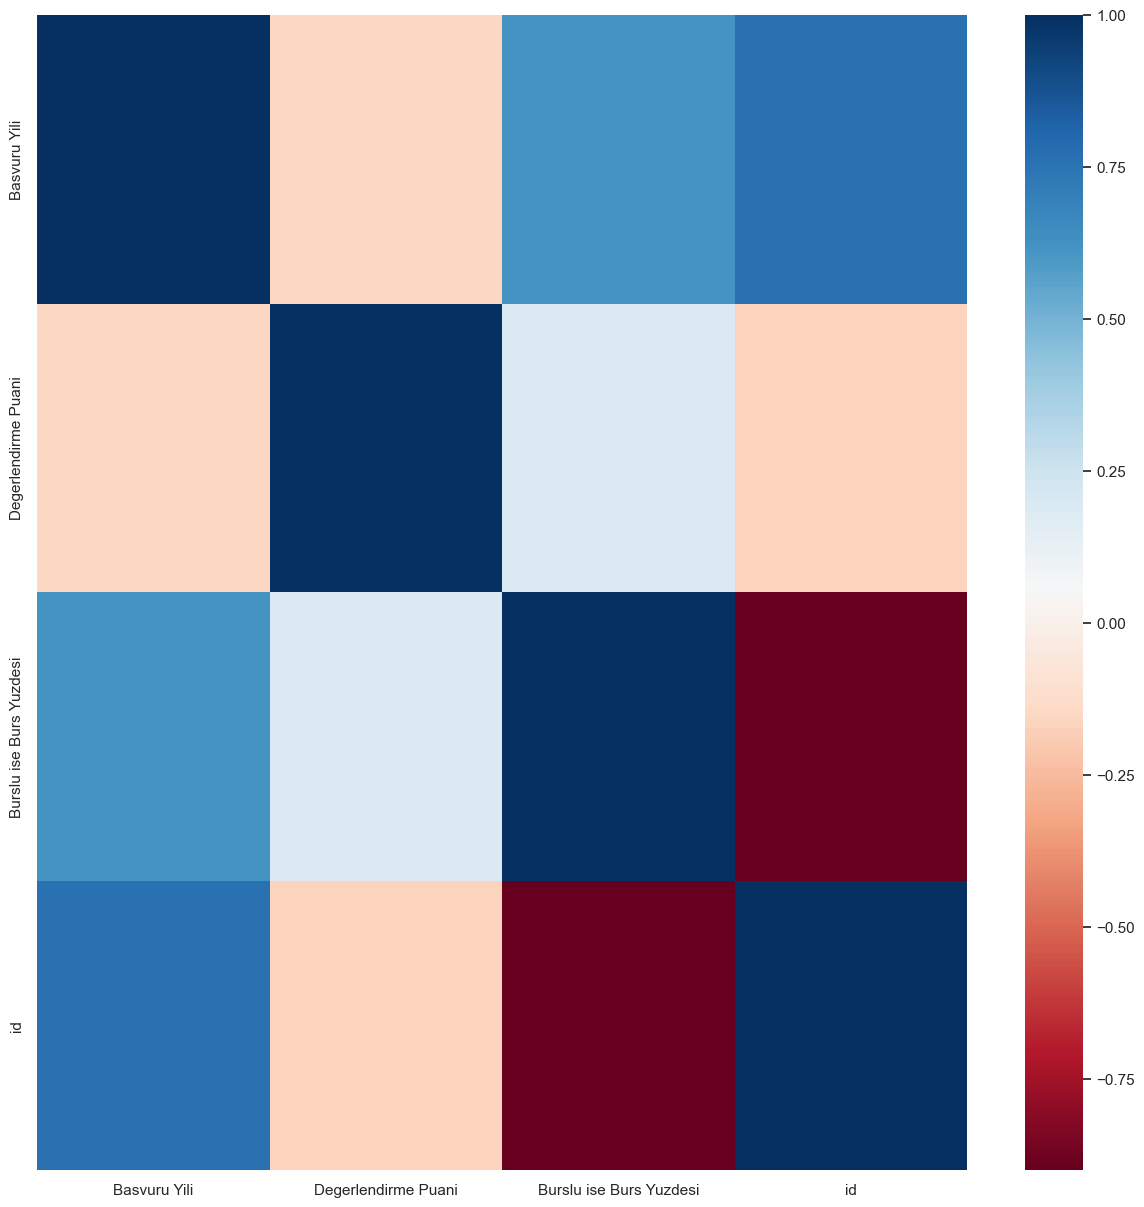

In [29]:
high_correlated_cols(df)
drop_list = high_correlated_cols(df, plot= True)